In [440]:
import pandas as pd
import numpy as np
import re

In [320]:
folder = './tripadvisor_selenium/saved_data_versions/'
version = 'version_20180804_2000/'

# Data input and cleansing

## Listings

In [897]:
#load listing dataset
listings_cols = ['list_id', 'list_name', 'list_rating', 'list_rating_hist', 'list_review_n',
                 'list_loc', 'time_accessed']
listings = pd.read_csv(folder + version + 'listings.csv',
            delimiter='|', names=listings_cols, header=None)
listings = listings[0:15]
listings

,list_id,list_name,list_rating,list_rating_hist,list_review_n,list_loc,time_accessed
0,g60763d267031,Manhattan Skyline,5 of 5 bubbles,83%;14%;1%;1%;1%,"18,669 Reviews","New York City, NY",2018-08-04 11:02:43.096171
1,g60763d105127,Central Park,4.5 of 5 bubbles,77%;19%;2%;1%;1%,"117,389 Reviews","59th to 110th Street, Manhattan Borough, from ...",2018-08-04 11:27:13.174765
2,g60763d105125,The Metropolitan Museum of Art,5 of 5 bubbles,80%;16%;2%;1%;1%,"49,271 Reviews","1000 5th Ave, New York City, NY 10028-0198",2018-08-04 11:56:34.658807
3,g60763d1687489,The National 9/11 Memorial & Museum,4.5 of 5 bubbles,77%;17%;4%;1%;1%,"81,445 Reviews","180 Greenwich St, World Trade Center, New York...",2018-08-04 12:17:09.729823
4,g60763d102741,Brooklyn Bridge,4.5 of 5 bubbles,72%;23%;3%;1%;1%,"18,248 Reviews","New York City, NY 10038",2018-08-04 12:38:14.956935
5,g60763d587661,Top of the Rock,4.5 of 5 bubbles,73%;21%;4%;1%;1%,"70,762 Reviews","30 Rockfeller Plaza, Enter on West 50th Street...",2018-08-04 13:56:18.047185
6,g60763d136053,St. Patrick's Cathedral,4.5 of 5 bubbles,70%;24%;4%;1%;1%,"11,698 Reviews","460 Madison Ave, New York City, NY 10022-6863",2018-08-04 15:49:32.387199
7,g60763d143361,Broadway,4.5 of 5 bubbles,72%;21%;5%;1%;1%,"26,674 Reviews","New York City, NY",2018-08-04 16:57:44.063361
8,g60763d136347,Bryant Park,4.5 of 5 bubbles,65%;29%;4%;1%;1%,"20,162 Reviews",between 40th and 42nd Streets & Fifth and Sixt...,2018-08-04 17:24:00.165670
9,g60763d103371,Grand Central Terminal,4.5 of 5 bubbles,64%;30%;4%;1%;1%,"38,174 Reviews","89 E 42nd Street, New York City, NY 10017-5503",2018-08-04 17:44:37.449878


In [898]:
#define a function to turn text ratings into numerical
def float_rating(rating_text):
    return float(rating_text.split(" ")[0])

float_rating('4.5 of 5 bubbles')

4.5

In [899]:
#define a function to turn review_n text into an integer
def int_review_n(review_n_text):
    return int(review_n_text.split(' ')[0].replace(',', ''))

int_review_n('117,356 Reviews')

117356

In [900]:
#update the fields in the table using the specified functions
listings.list_rating = listings.list_rating.apply(float_rating)
listings.list_review_n = listings.list_review_n.apply(int_review_n)
listings.head()

,list_id,list_name,list_rating,list_rating_hist,list_review_n,list_loc,time_accessed
0,g60763d267031,Manhattan Skyline,5.0,83%;14%;1%;1%;1%,18669,"New York City, NY",2018-08-04 11:02:43.096171
1,g60763d105127,Central Park,4.5,77%;19%;2%;1%;1%,117389,"59th to 110th Street, Manhattan Borough, from ...",2018-08-04 11:27:13.174765
2,g60763d105125,The Metropolitan Museum of Art,5.0,80%;16%;2%;1%;1%,49271,"1000 5th Ave, New York City, NY 10028-0198",2018-08-04 11:56:34.658807
3,g60763d1687489,The National 9/11 Memorial & Museum,4.5,77%;17%;4%;1%;1%,81445,"180 Greenwich St, World Trade Center, New York...",2018-08-04 12:17:09.729823
4,g60763d102741,Brooklyn Bridge,4.5,72%;23%;3%;1%;1%,18248,"New York City, NY 10038",2018-08-04 12:38:14.956935


In [901]:
#define a function to expand histogram data into multiple rows (will be used for listings and users)
def hist_expand(rating_hist, id_):
    rating_hist = re.findall('[\d,]+', rating_hist)
    rating_hist = list(map(lambda x: int(x.replace(',', '')), rating_hist))
    rating = list(range(5,0,-1))
    rating_hist = pd.DataFrame({'n_ratings': rating_hist, 'rating': rating, 'list_id': [id_]*5})
    return rating_hist
    
hist_expand('83%;14%;1%;1%;1%', 'g60763d267031')

,list_id,n_ratings,rating
0,g60763d267031,83,5
1,g60763d267031,14,4
2,g60763d267031,1,3
3,g60763d267031,1,2
4,g60763d267031,1,1


In [902]:
#construct listing hist dataframe using function
listings_hist = pd.concat(map(hist_expand, listings.list_rating_hist, listings.list_id))
listings_hist.head(10)

,list_id,n_ratings,rating
0,g60763d267031,83,5
1,g60763d267031,14,4
2,g60763d267031,1,3
3,g60763d267031,1,2
4,g60763d267031,1,1
0,g60763d105127,77,5
1,g60763d105127,19,4
2,g60763d105127,2,3
3,g60763d105127,1,2
4,g60763d105127,1,1


## Reviews

In [903]:
#load reviews dataset
review_cols = ['list_id', 'review_title', 'review_date', 'review_rating',
               'review_text', 'review_is_mobile', 'time_accessed', 'review_username']
reviews = pd.read_csv(folder + version + 'reviews.csv',
                    delimiter='|', names=review_cols, header=None)
listing_mask = [listing in listings['list_id'].values for listing in reviews['list_id']] #keep first 15 listings
reviews = reviews[listing_mask]
print(len(reviews))
reviews.head()

12251


,list_id,review_title,review_date,review_rating,review_text,review_is_mobile,time_accessed,review_username
0,g60763d267031,"They were long queues, continuity was good to ...","August 3, 2018",ui_bubble_rating bubble_50,"They were long queues, continuity was good to ...",False,2018-08-04 11:02:43.701526,mimmasturbo111
1,g60763d267031,Outstanding,"August 3, 2018",ui_bubble_rating bubble_50,"Marked by eminence and distinction, it is clea...",False,2018-08-04 11:02:46.252776,560giorgiog
2,g60763d267031,Good views..,"August 2, 2018",ui_bubble_rating bubble_40,We loved this especially during twilight. Its ...,False,2018-08-04 11:02:47.586645,KKS81
3,g60763d267031,Beautiful Views!,"August 2, 2018",ui_bubble_rating bubble_50,Got to see the skyline from all sides. My hote...,False,2018-08-04 11:02:49.367525,JenJen1865
4,g60763d267031,Several ways to see and I have done them all!,"August 2, 2018",ui_bubble_rating bubble_50,You will really need to see the Manhattan skyl...,False,2018-08-04 11:02:51.278740,nyc15


In [904]:
#turn the stars into int values
reviews['review_rating'] = reviews['review_rating'].apply(lambda x: int(x[-2:])/10)
reviews.head()

,list_id,review_title,review_date,review_rating,review_text,review_is_mobile,time_accessed,review_username
0,g60763d267031,"They were long queues, continuity was good to ...","August 3, 2018",5.0,"They were long queues, continuity was good to ...",False,2018-08-04 11:02:43.701526,mimmasturbo111
1,g60763d267031,Outstanding,"August 3, 2018",5.0,"Marked by eminence and distinction, it is clea...",False,2018-08-04 11:02:46.252776,560giorgiog
2,g60763d267031,Good views..,"August 2, 2018",4.0,We loved this especially during twilight. Its ...,False,2018-08-04 11:02:47.586645,KKS81
3,g60763d267031,Beautiful Views!,"August 2, 2018",5.0,Got to see the skyline from all sides. My hote...,False,2018-08-04 11:02:49.367525,JenJen1865
4,g60763d267031,Several ways to see and I have done them all!,"August 2, 2018",5.0,You will really need to see the Manhattan skyl...,False,2018-08-04 11:02:51.278740,nyc15


In [905]:
#convert date text to datetimes
reviews.review_date = pd.to_datetime(reviews.review_date)
reviews.head()

,list_id,review_title,review_date,review_rating,review_text,review_is_mobile,time_accessed,review_username
0,g60763d267031,"They were long queues, continuity was good to ...",2018-08-03,5.0,"They were long queues, continuity was good to ...",False,2018-08-04 11:02:43.701526,mimmasturbo111
1,g60763d267031,Outstanding,2018-08-03,5.0,"Marked by eminence and distinction, it is clea...",False,2018-08-04 11:02:46.252776,560giorgiog
2,g60763d267031,Good views..,2018-08-02,4.0,We loved this especially during twilight. Its ...,False,2018-08-04 11:02:47.586645,KKS81
3,g60763d267031,Beautiful Views!,2018-08-02,5.0,Got to see the skyline from all sides. My hote...,False,2018-08-04 11:02:49.367525,JenJen1865
4,g60763d267031,Several ways to see and I have done them all!,2018-08-02,5.0,You will really need to see the Manhattan skyl...,False,2018-08-04 11:02:51.278740,nyc15


## Users

In [907]:
#load user dataset
user_cols = ['reviewer_username', 'reviewer_demos', 'review_hist',
             'helpvotes', 'n_cities_visited', 'tags', 'time_accessed']
users = pd.read_csv(folder + version + 'users.csv',
                    delimiter='|', names=user_cols, header=None)

#keep only the last recorded record of each user; 
#if a user reviewed multiple locations I scraped they could be found multiple times
users = users.drop_duplicates('reviewer_username', keep='last')

#keep only users from the remaining listings
listings_mask = [reviewer in reviews['review_username'].values for reviewer in users['reviewer_username']]
users = users[listings_mask]

print(len(users))
users.head()

8901


,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7 Helpful votes,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54 Helpful votes,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,NaN,90 Cities visited,NaN,2018-08-04 11:03:29.930886
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25 Helpful votes,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6 Helpful votes,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631


In [908]:
#define function to extract the user's hometown
def demos_hometown(demos):
    try:
        demos = demos.lower()
        hometown = re.search('from .*;?', demos).group()
        return hometown.replace('from ', '')
    except:
        return None

demos_hometown('TripAdvisor member since 2015;25-34 man from Brisbane Region, Australia')

'brisbane region, australia'

In [909]:
#define function to extract the year the user joined TripAdvisor
def demos_join_year(demos):
    try:
        join_year = re.search('TripAdvisor member since \d+', demos).group()
        join_year = int(re.search('\d{4}', join_year).group())
        return join_year
    except:
        return None
    
demos_join_year('TripAdvisor member since 2015;25-34 man from Brisbane Region, Australia')

2015

In [910]:
#define function to get the user's gender
def demos_gender(demos):
    try:
        demos = demos.lower()
        if demos.find('woman') != -1:
            return 'F'
        elif demos.find('man') != -1:
            return 'M'
        else:
            return None
        
    except:
        return None

demos_gender('TripAdvisor member since 2015;25-34 man from Brisbane Region, Australia')

'M'

In [911]:
#define functon to get the user's age
def demos_age(demos):
    try:
        return re.search('\d+-\d+', demos).group()
    except:
        return None

demos_age('TripAdvisor member since 2015;25-34 man from Brisbane Region, Australia')

'25-34'

In [912]:
#apply functions
users['join_year'] = users['reviewer_demos'].apply(demos_join_year)
users['hometown'] = users['reviewer_demos'].apply(demos_hometown)
users['gender'] = users['reviewer_demos'].apply(demos_gender)
users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7 Helpful votes,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54 Helpful votes,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,NaN,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25 Helpful votes,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6 Helpful votes,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F


In [913]:
#define a function to expand user tags
def user_tag_expand(reviewer_username, tags):
    try:
        tags = tags.split(';')
        return pd.DataFrame({'reviewer_username': reviewer_username, 'tags': tags})
    except:
        return None

user_tag_expand('nyc15', 'Urban Explorer;History Buff;Family Vacationer')

,reviewer_username,tags
0,nyc15,Urban Explorer
1,nyc15,History Buff
2,nyc15,Family Vacationer


In [914]:
#create user tags df
user_tag = pd.concat(list(map(user_tag_expand, users['reviewer_username'], users['tags'])), ignore_index=True)
user_tag.head()

,reviewer_username,tags
0,560giorgiog,Art and Architecture Lover
1,560giorgiog,Vegetarian
2,560giorgiog,Like a Local
3,560giorgiog,History Buff
4,sankmik,Foodie


In [915]:
#construct listing hist dataframe using function
users_hist = users.loc[~ pd.isna(users['review_hist']), :] #remove users w/o enough historical reviews to get a hist
users_hist = pd.concat(map(hist_expand, users_hist.review_hist, users_hist.reviewer_username))
users_hist.head(10)

,list_id,n_ratings,rating
0,560giorgiog,14,5
1,560giorgiog,3,4
2,560giorgiog,1,3
3,560giorgiog,0,2
4,560giorgiog,2,1
0,sankmik,91,5
1,sankmik,115,4
2,sankmik,48,3
3,sankmik,9,2
4,sankmik,1,1


In [916]:
#define function to simulate review-level data (for use in violin plot)
def hist_expand_full(review_hist, reviewer_username):
    rows=hist_expand(review_hist, '')
    row_expand = lambda row: np.ones(row.n_ratings)*row.rating
    expanded = np.concatenate(list(map(row_expand, rows.itertuples())))
    return pd.DataFrame({'rating': expanded, 'id': reviewer_username})
    
hist_expand_full('91;115;48;9;1', 'sankmik')

,id,rating
0,sankmik,5.0
1,sankmik,5.0
2,sankmik,5.0
3,sankmik,5.0
4,sankmik,5.0
5,sankmik,5.0
6,sankmik,5.0
7,sankmik,5.0
8,sankmik,5.0
9,sankmik,5.0


In [917]:
#create expanded hist dataframe
users_expanded_hist = pd.concat(list(map(hist_expand_full, users.loc[~pd.isna(users['review_hist']), 'review_hist'],
                                     users.loc[~pd.isna(users['review_hist']), 'reviewer_username'])),
                                ignore_index=True)
users_expanded_hist.head()

,id,rating
0,560giorgiog,5.0
1,560giorgiog,5.0
2,560giorgiog,5.0
3,560giorgiog,5.0
4,560giorgiog,5.0


In [1053]:
#add the number of reviews to the user table; also a binned version
users['n_reviews'] = users.review_hist.apply(lambda x: np.NaN if pd.isna(x) else hist_expand(x, 'a').n_ratings.sum())

users['n_reviews_bin'] = pd.cut(users['n_reviews'], [0, 10, 50, 100, 250, 1000])

users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender,n_reviews,pct_helpful,median_rating,tendency,mode_rating,mean_rating,relative_mean,n_reviews_bin,mode_rating_grouped
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None,20.0,0.350000,5.0,0.700000,5.0,4.350000,-3.650000,"(10, 50]",5.0
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M,264.0,0.204545,4.0,0.435606,4.0,4.083333,-2.916667,"(250, 1000]",4.0
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,0,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M,49.0,0.510204,4.0,0.489796,5.0,4.204082,-3.795918,"(10, 50]",5.0
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F,25.0,0.240000,4.0,0.520000,4.0,4.400000,-2.600000,"(10, 50]",4.0


In [919]:
#convert help votes into int
users.helpvotes = users.helpvotes.apply(lambda a: 0 if pd.isna(a) else int(re.search('^\d+', a).group()))
#pct help votes
users['pct_helpful'] = users.helpvotes / users.n_reviews
users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender,n_reviews,pct_helpful
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None,20.0,0.350000
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M,264.0,0.204545
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,0,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None,NaN,NaN
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M,49.0,0.510204
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F,25.0,0.240000


In [920]:
#define a function to find the median rating
def median_rating(rating_hist):
    #expand the ratings histogram
    a = hist_expand(rating_hist, '_')
    
    #track the cumulate ratings
    a['cum'] = a.groupby('list_id').n_ratings.cumsum()
    
    #identify the rating where we reach or cross the median threshold
    row = a.loc[a['cum']>=a.n_ratings.sum()/2].iloc[0, :]
    
    #return that row's rating if we've crossed the median threshold; return that rating - 0.5 if we've just reached it
    if row.cum == a.n_ratings.sum()/2:
        return row.rating - 0.5
    else:
        return row.rating

median_rating('14;3;1;0;2')

5

In [921]:
#apply to dataframe to get each user's median rating
users['median_rating'] = users.review_hist.apply(lambda x: np.NaN if pd.isna(x) else median_rating(x))
users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender,n_reviews,pct_helpful,median_rating
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None,20.0,0.350000,5.0
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M,264.0,0.204545,4.0
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,0,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None,NaN,NaN,NaN
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M,49.0,0.510204,4.0
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F,25.0,0.240000,4.0


In [922]:
#the strength of a user's tendency to their mode rating
users['tendency'] = users.review_hist.apply(lambda x: np.NaN if pd.isna(x) else hist_expand(x, '_').n_ratings.max())\
                                         / users.n_reviews
users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender,n_reviews,pct_helpful,median_rating,tendency
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None,20.0,0.350000,5.0,0.700000
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M,264.0,0.204545,4.0,0.435606
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,0,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None,NaN,NaN,NaN,NaN
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M,49.0,0.510204,4.0,0.489796
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F,25.0,0.240000,4.0,0.520000


In [923]:
#define mode and mean rating functions
def mode_rating(rating_hist):
    #expand the ratings histogram
    a = hist_expand(rating_hist, '_')
    return a.sort_values('n_ratings', ascending=False).iloc[0, 2]

def mean_rating(rating_hist):
    a = hist_expand(rating_hist, '_')
    a['total'] = a['n_ratings'] * a['rating']
    return a.total.sum() / a.n_ratings.sum()

mode_rating('91;115;48;9;1')
mean_rating('91;115;48;9;1')

4

4.083333333333333

In [924]:
#apply functions
users['mode_rating'] = users.review_hist.apply(lambda x: np.NaN if pd.isna(x) else mode_rating(x))
users['mean_rating'] = users.review_hist.apply(lambda x: np.NaN if pd.isna(x) else mean_rating(x))
users.head()

,reviewer_username,reviewer_demos,review_hist,helpvotes,n_cities_visited,tags,time_accessed,join_year,hometown,gender,n_reviews,pct_helpful,median_rating,tendency,mode_rating,mean_rating
1,560giorgiog,TripAdvisor member since 2018,14;3;1;0;2,7,18 Cities visited,Art and Architecture Lover;Vegetarian;Like a L...,2018-08-04 11:02:47.337227,2018.0,None,None,20.0,0.350000,5.0,0.700000,5.0,4.350000
20,sankmik,TripAdvisor member since 2011;25-34 man from B...,91;115;48;9;1,54,42 Cities visited,Foodie;Nature Lover;Backpacker;Beach Goer,2018-08-04 11:03:29.037790,2011.0,"bengaluru, india",M,264.0,0.204545,4.0,0.435606,4.0,4.083333
21,https://www.tripadvisor.com/MemberProfile-a_ui...,TripAdvisor member since 2008,NaN,0,90 Cities visited,NaN,2018-08-04 11:03:29.930886,2008.0,None,None,NaN,NaN,NaN,NaN,NaN,NaN
25,DizFanatic,TripAdvisor member since 2011;35-49 man from N...,24;16;6;1;2,25,154 Cities visited,Foodie;Shopping Fanatic;Luxury Traveler;Thrift...,2018-08-04 11:03:34.380884,2011.0,"new york city, new york",M,49.0,0.510204,4.0,0.489796,5.0,4.204082
30,gunnmaritd,TripAdvisor member since 2016;Woman from Krist...,11;13;1;0;0,6,8 Cities visited,Foodie;Peace and Quiet Seeker;Family Vacationer,2018-08-04 11:03:40.896631,2016.0,"kristiansand, norway",F,25.0,0.240000,4.0,0.520000,4.0,4.400000


In [1088]:
#create an expanded histogram dataframe with the other user features
a = users_expanded_hist.merge(users, left_on='id', right_on='reviewer_username')
a['join_year_bins'] = pd.cut(a.join_year, bins=[2001, 2005, 2010, 2015, 2018])

# Exploratory EDA

In [926]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

%matplotlib inline

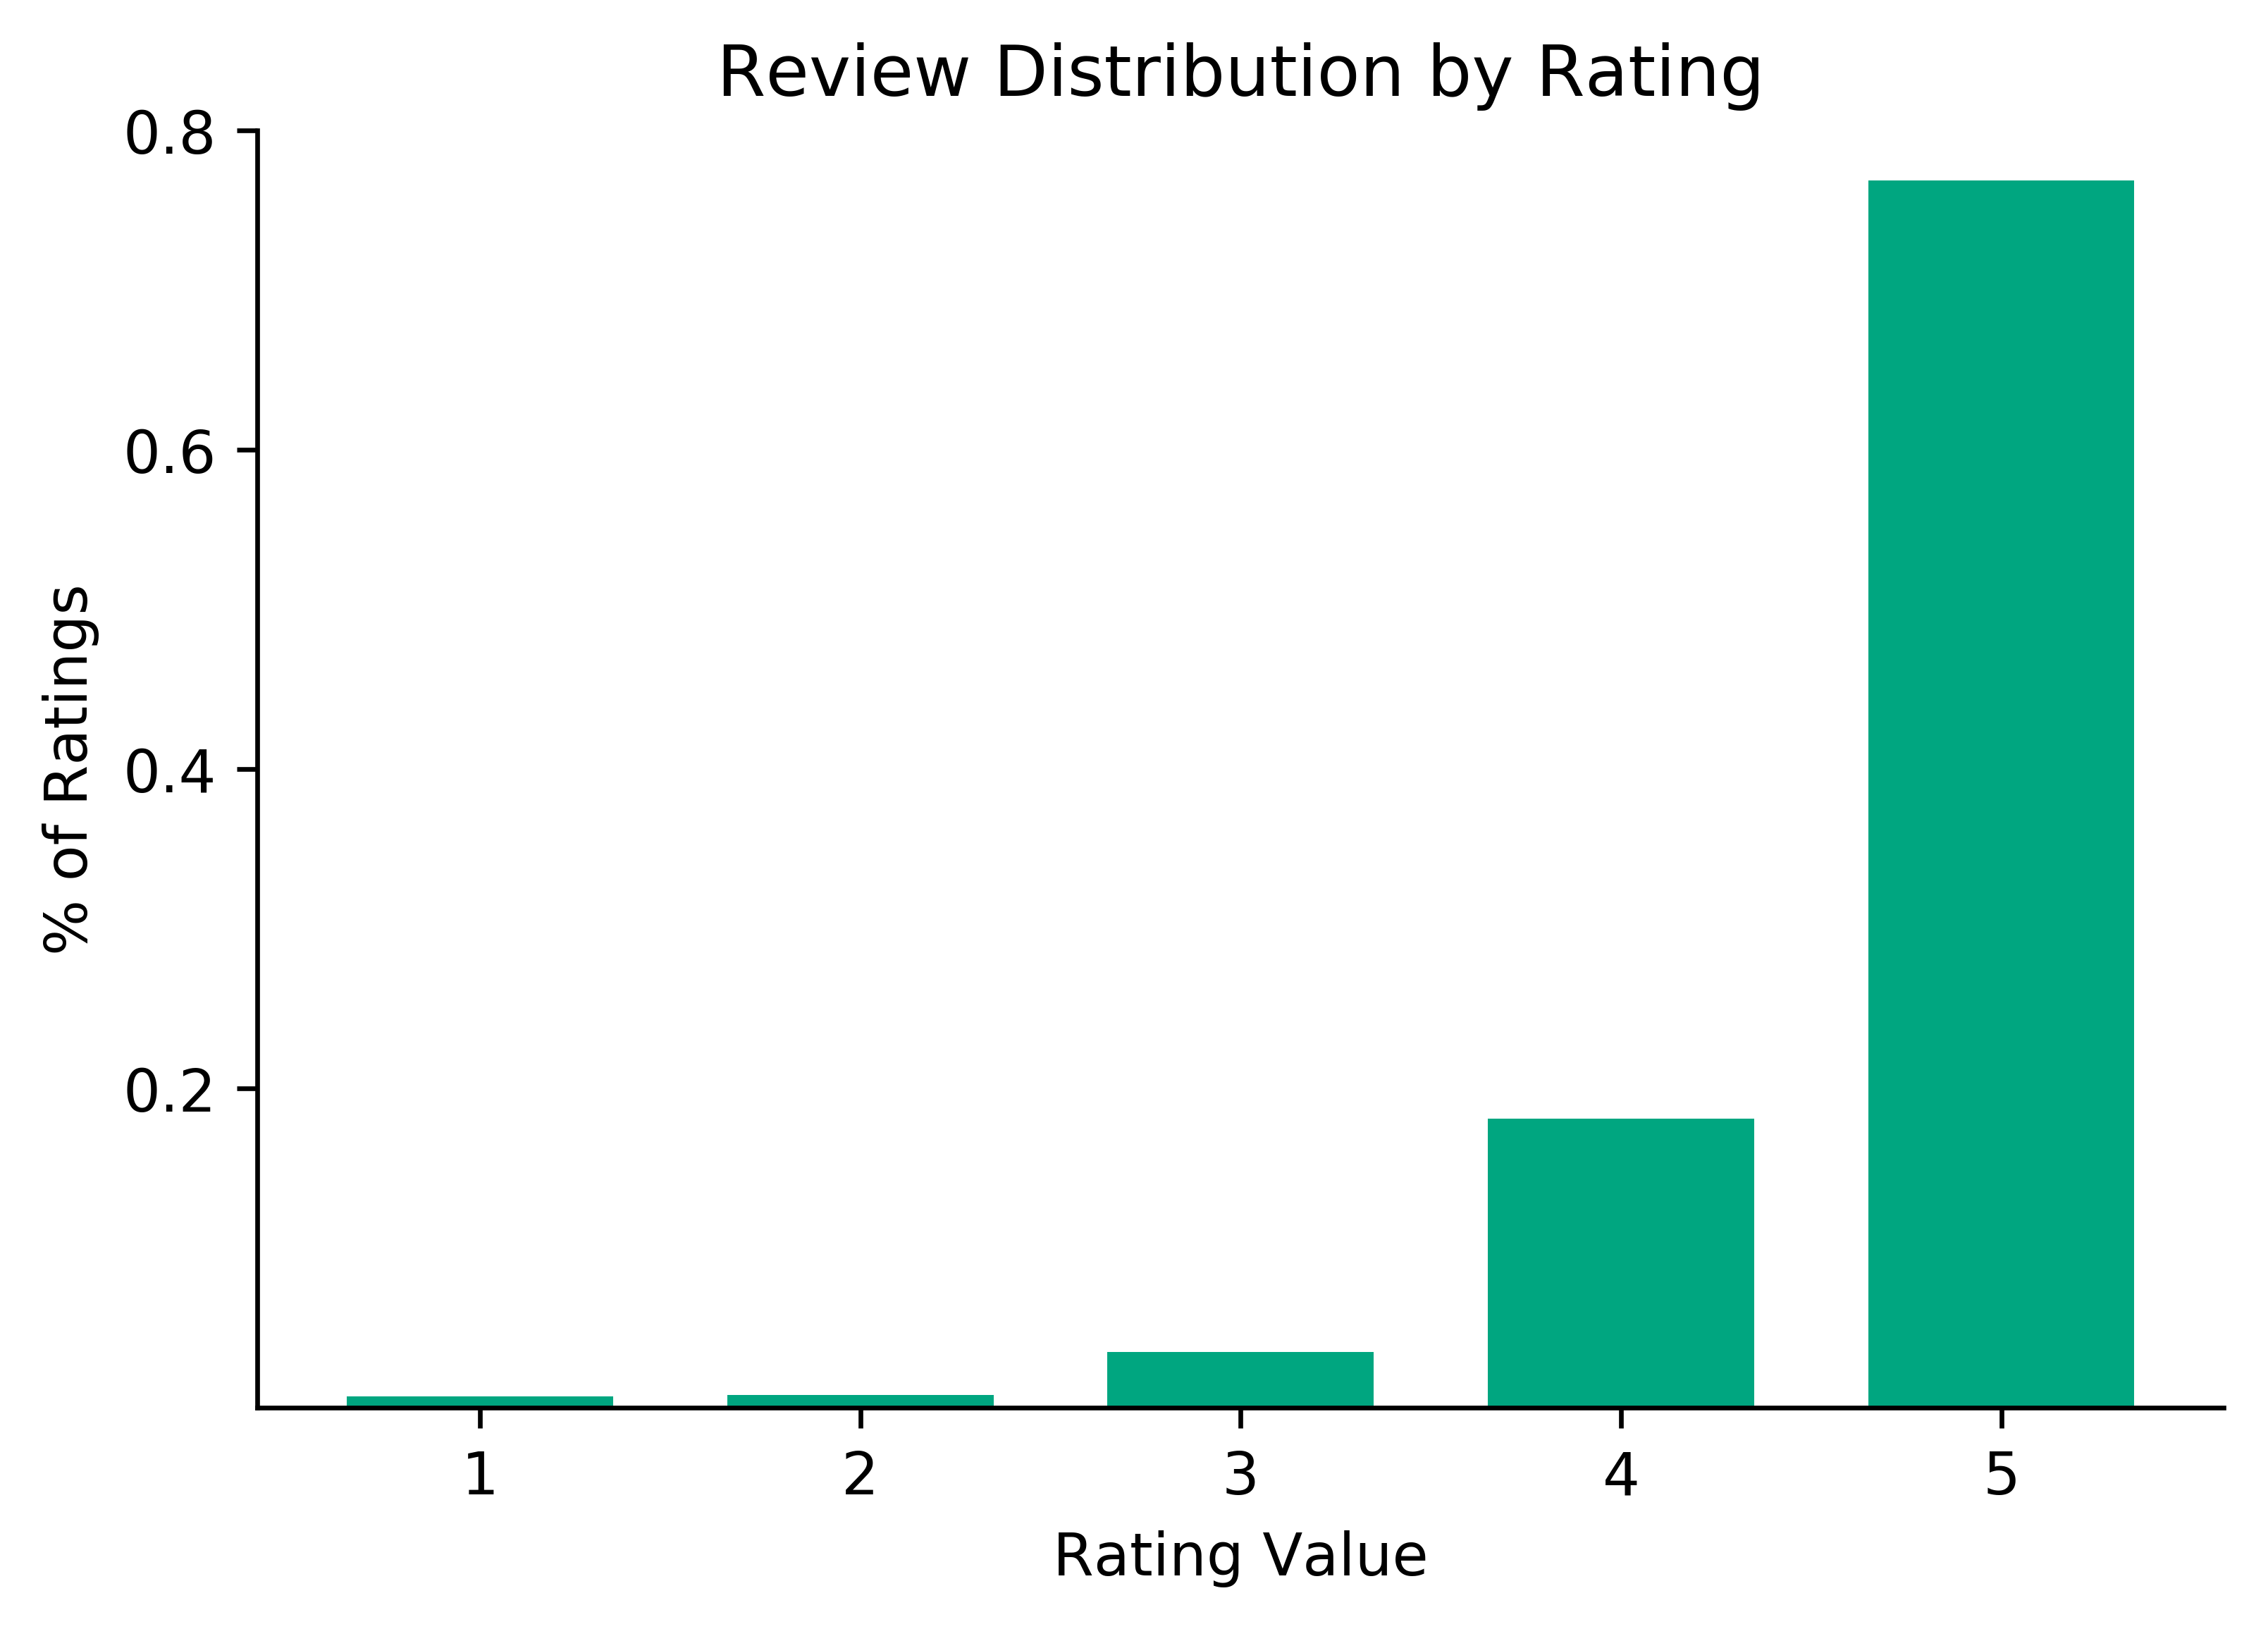

In [973]:
#histogram of reviews for the attractions I looked at
fig, ax = plt.subplots(dpi=600)

_ = ax.hist(reviews['review_rating'], density=True, bins=[1,2,3,4,5,6], rwidth=0.7, align='left', color='#00a680')

_ = ax.set_title('Review Distribution by Rating')
_ = ax.set_xlabel('Rating Value')
_ = ax.set_ylim(0, 0.8)
_ = ax.set_ylabel('% of Ratings')
_ = ax.set_yticks([0.2, 0.4, 0.6, 0.8])

_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)

plt.savefig('figures/1_histogram.png')

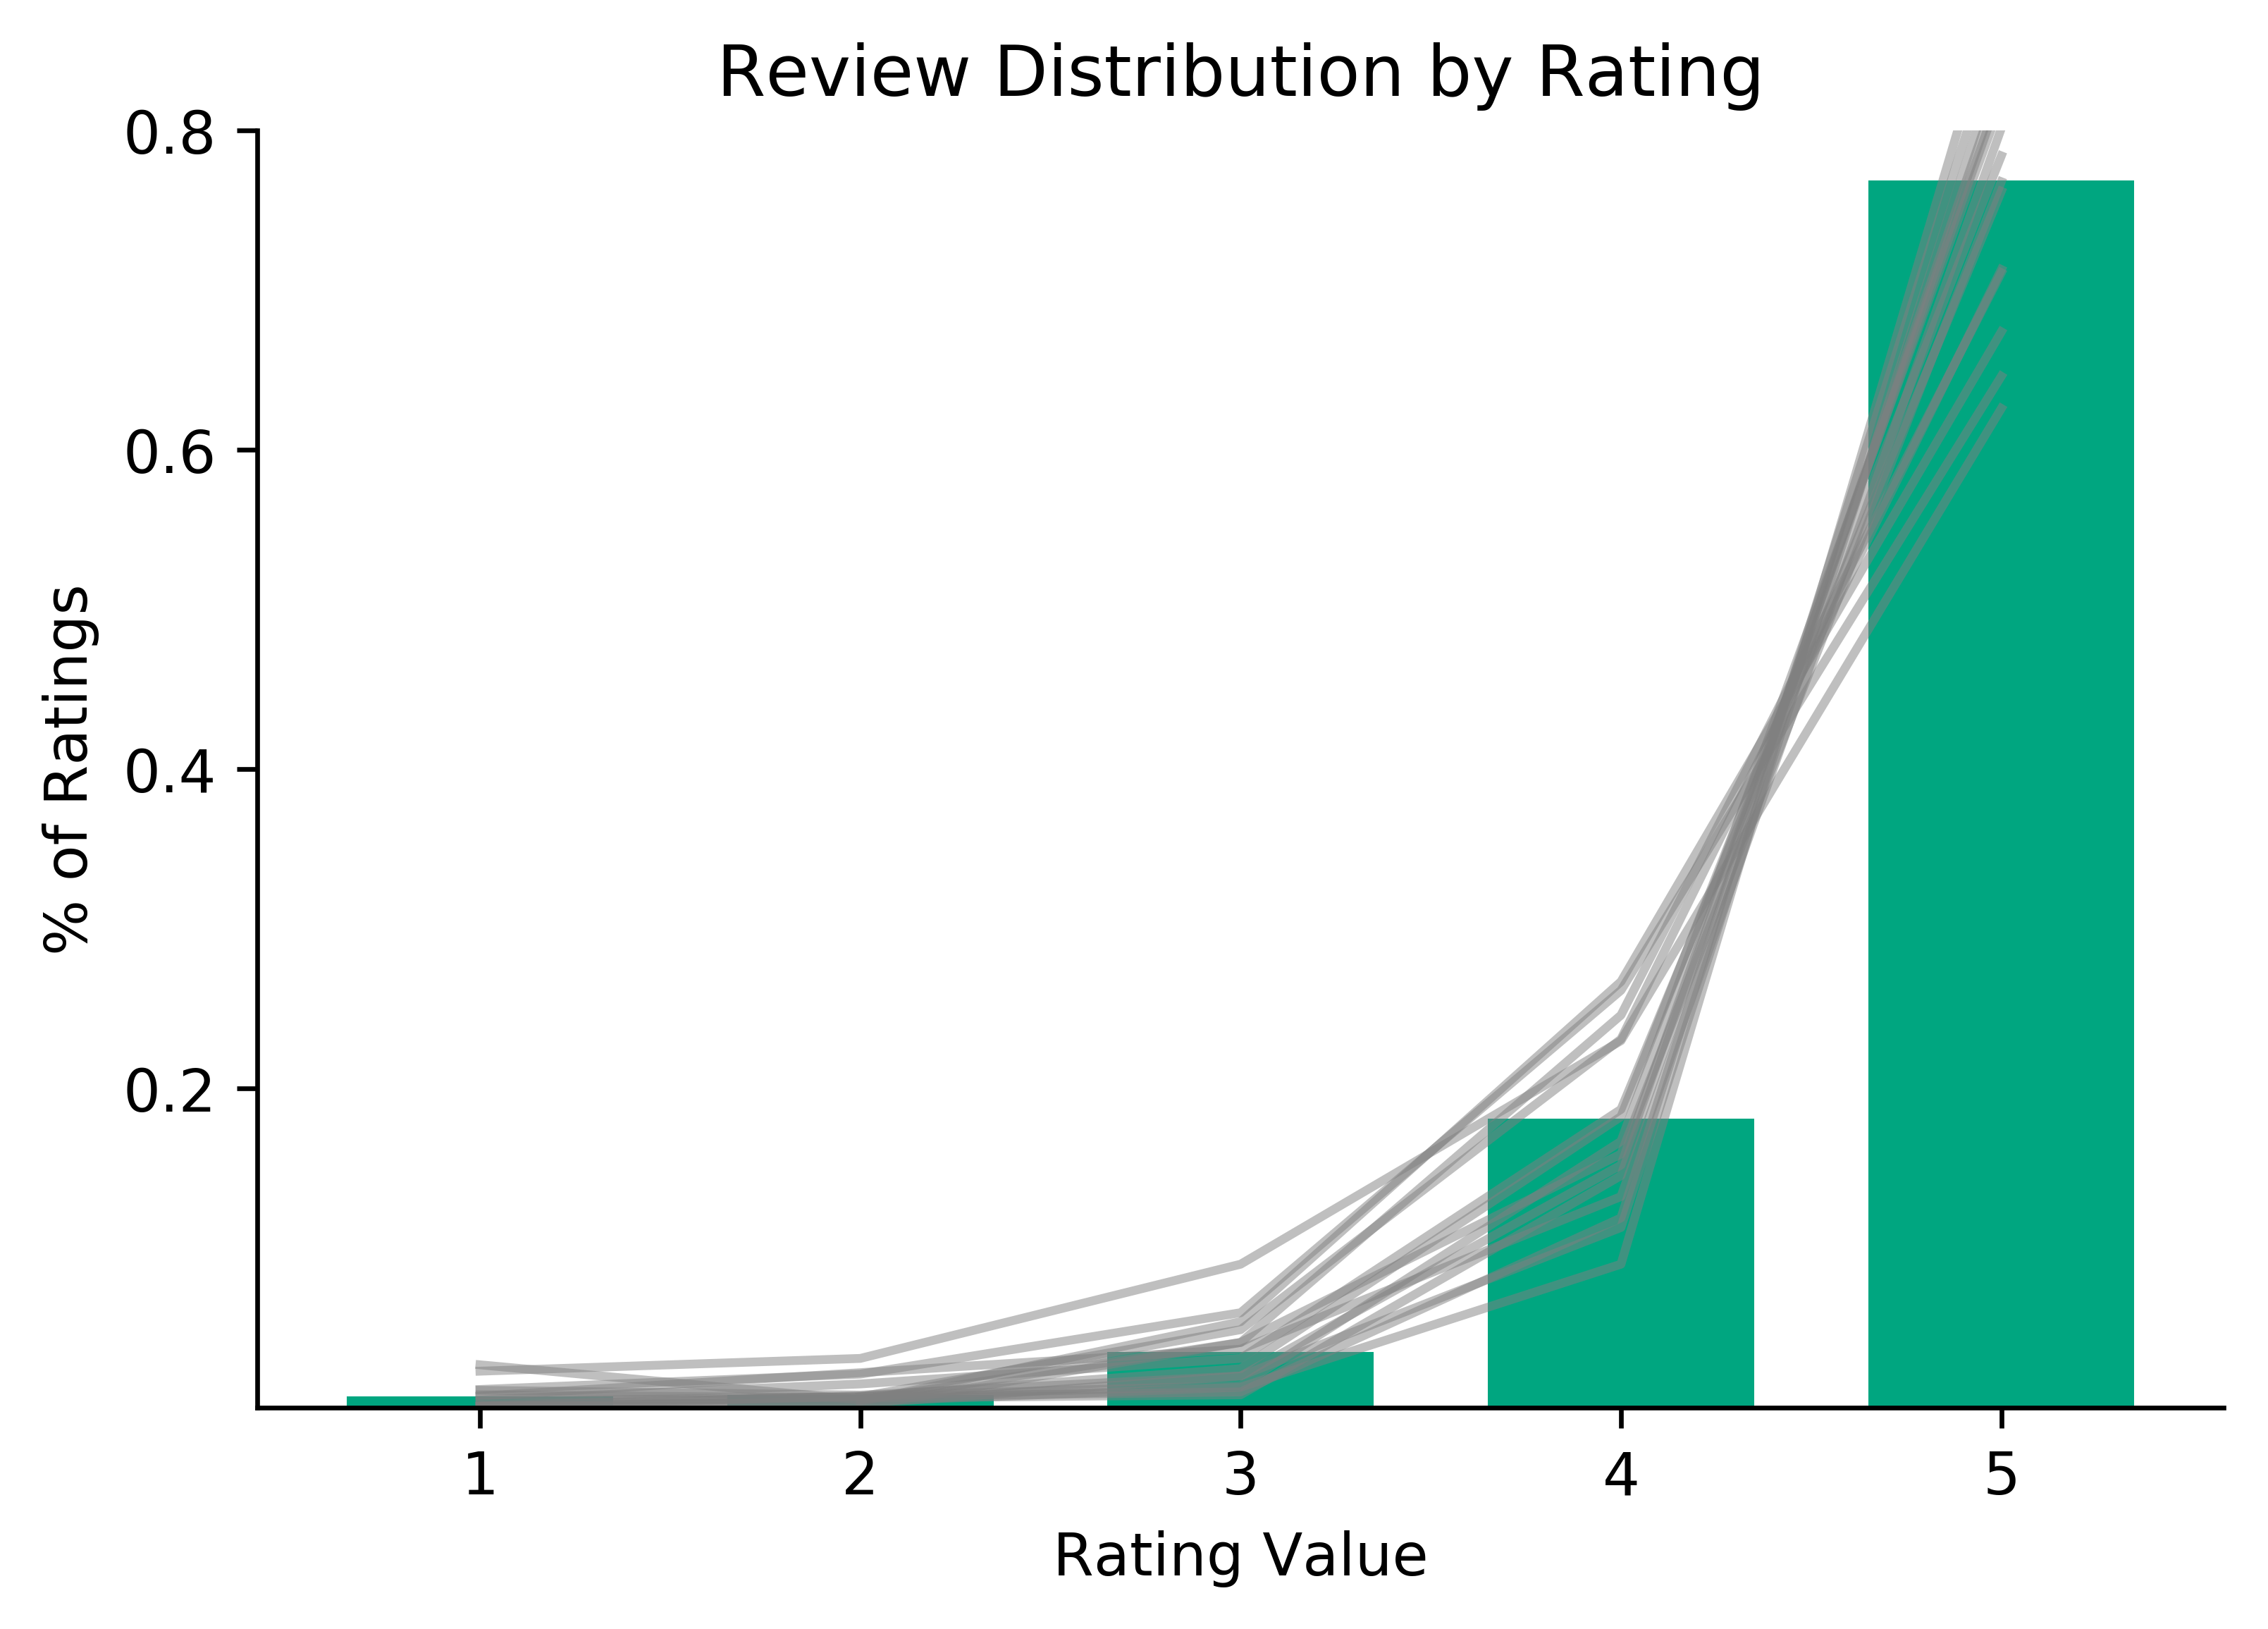

In [972]:
#histogram of reviews for the attractions I looked at
fig, ax = plt.subplots(dpi=600)

_ = ax.hist(reviews['review_rating'], density=True, bins=[1,2,3,4,5,6], rwidth=0.7, align='left', color='#00a680')

#layer on individual locations
by_location = (reviews.groupby(['list_id', 'review_rating'])['review_text'].count().rename('count').
               groupby('list_id').apply(lambda x: x / float(x.sum())).groupby('list_id'))
for listing in by_location:
    by_location_plot = ax.plot(listing[1].index.get_level_values(1), listing[1].values, color='grey', alpha=0.5)

_ = ax.set_title('Review Distribution by Rating')
_ = ax.set_xlabel('Rating Value')
_ = ax.set_ylim(0, 0.8)
_ = ax.set_ylabel('% of Ratings')
_ = ax.set_yticks([0.2, 0.4, 0.6, 0.8])

_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)

plt.savefig('figures/2_histogram_wlists.png')

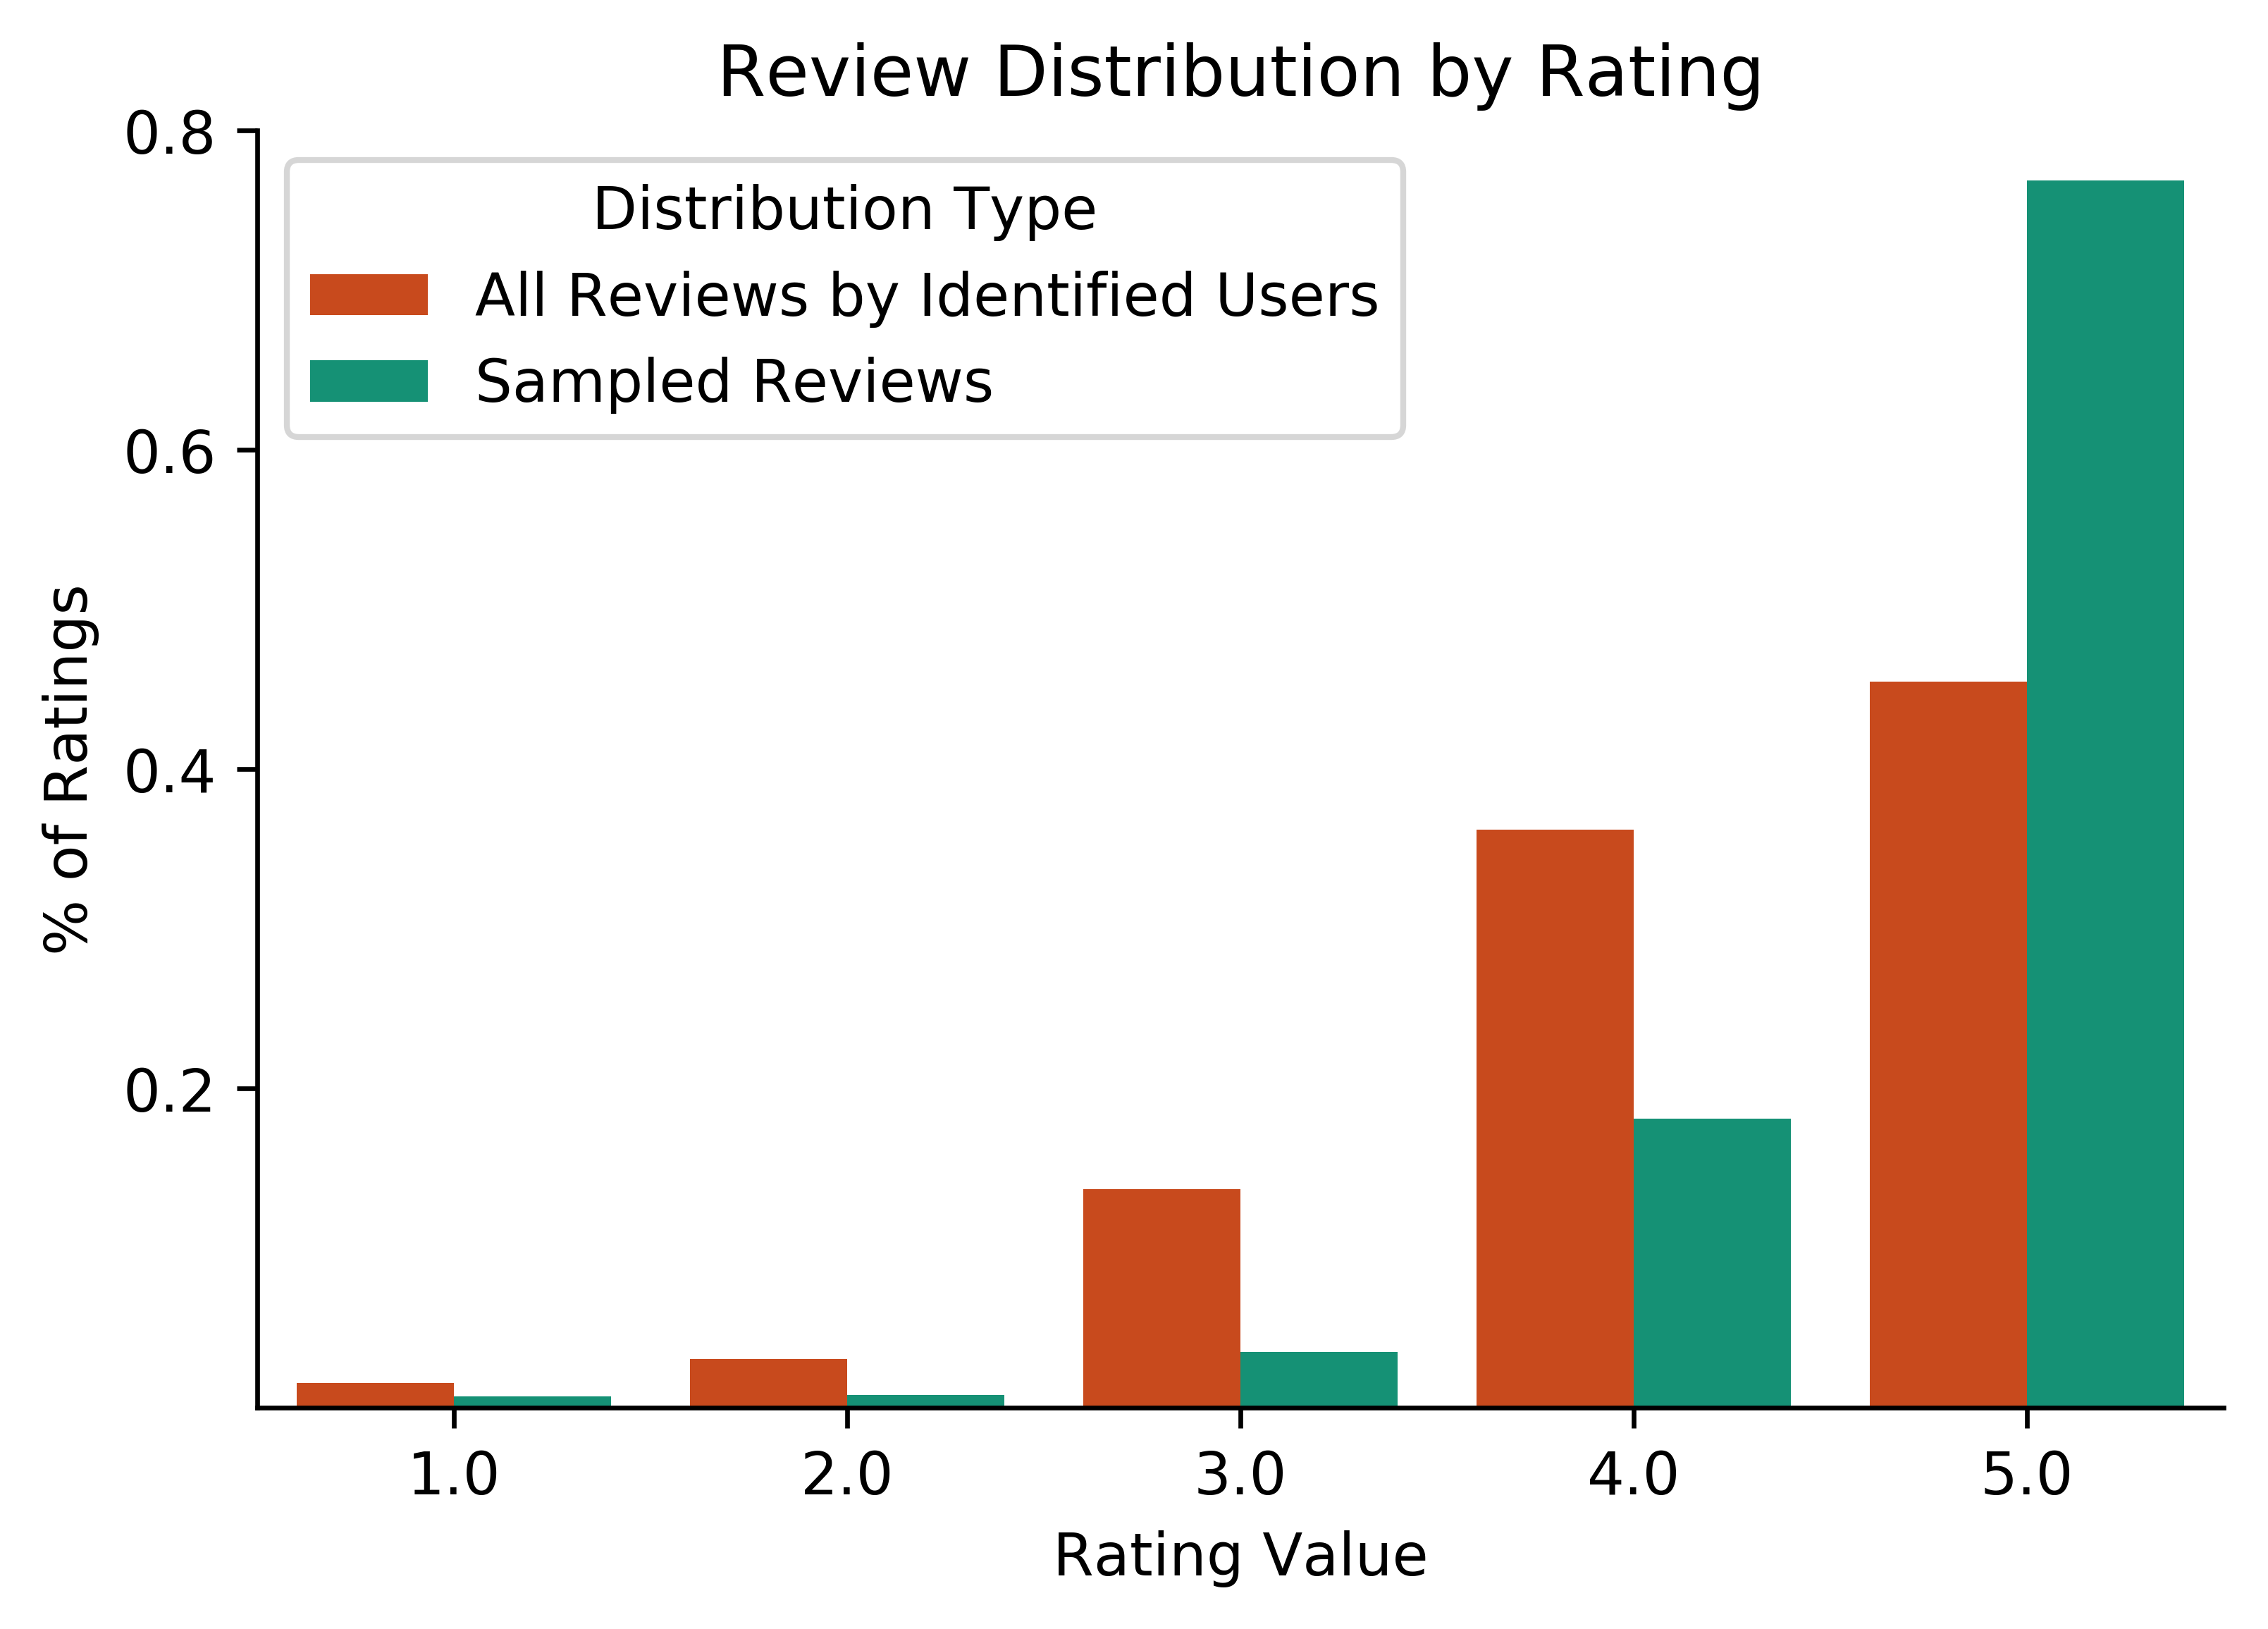

In [988]:
#compare to the overall rating distributions from the underlying users
fig, ax = plt.subplots(dpi=600)

users_dist = users_hist.groupby('rating').n_ratings.apply(lambda x: x.sum()/users_hist.n_ratings.sum())
reviews_dist = (reviews.groupby('review_rating')['review_text'].
                count().rename('n_ratings').apply(lambda x: x / len(reviews)))
combined = pd.DataFrame(pd.concat([users_dist, reviews_dist])).reset_index()
combined['Distribution Type'] = ['All Reviews by Identified Users']*5 + ['Sampled Reviews']*5

_ = sns.barplot(x='index', y='n_ratings', data=combined, hue='Distribution Type',
                palette=['#E53D00', '#00A680'], dodge=True)

_ = sns.despine()
_ = plt.ylim(0, 0.8)
_ = plt.xlabel('Rating Value')
_ = plt.ylabel('% of Ratings')
_ = plt.yticks([0.2, 0.4, 0.6, 0.8])
_ = plt.title('Review Distribution by Rating')

plt.savefig('figures/3_histogram_reviews_v_users.png')

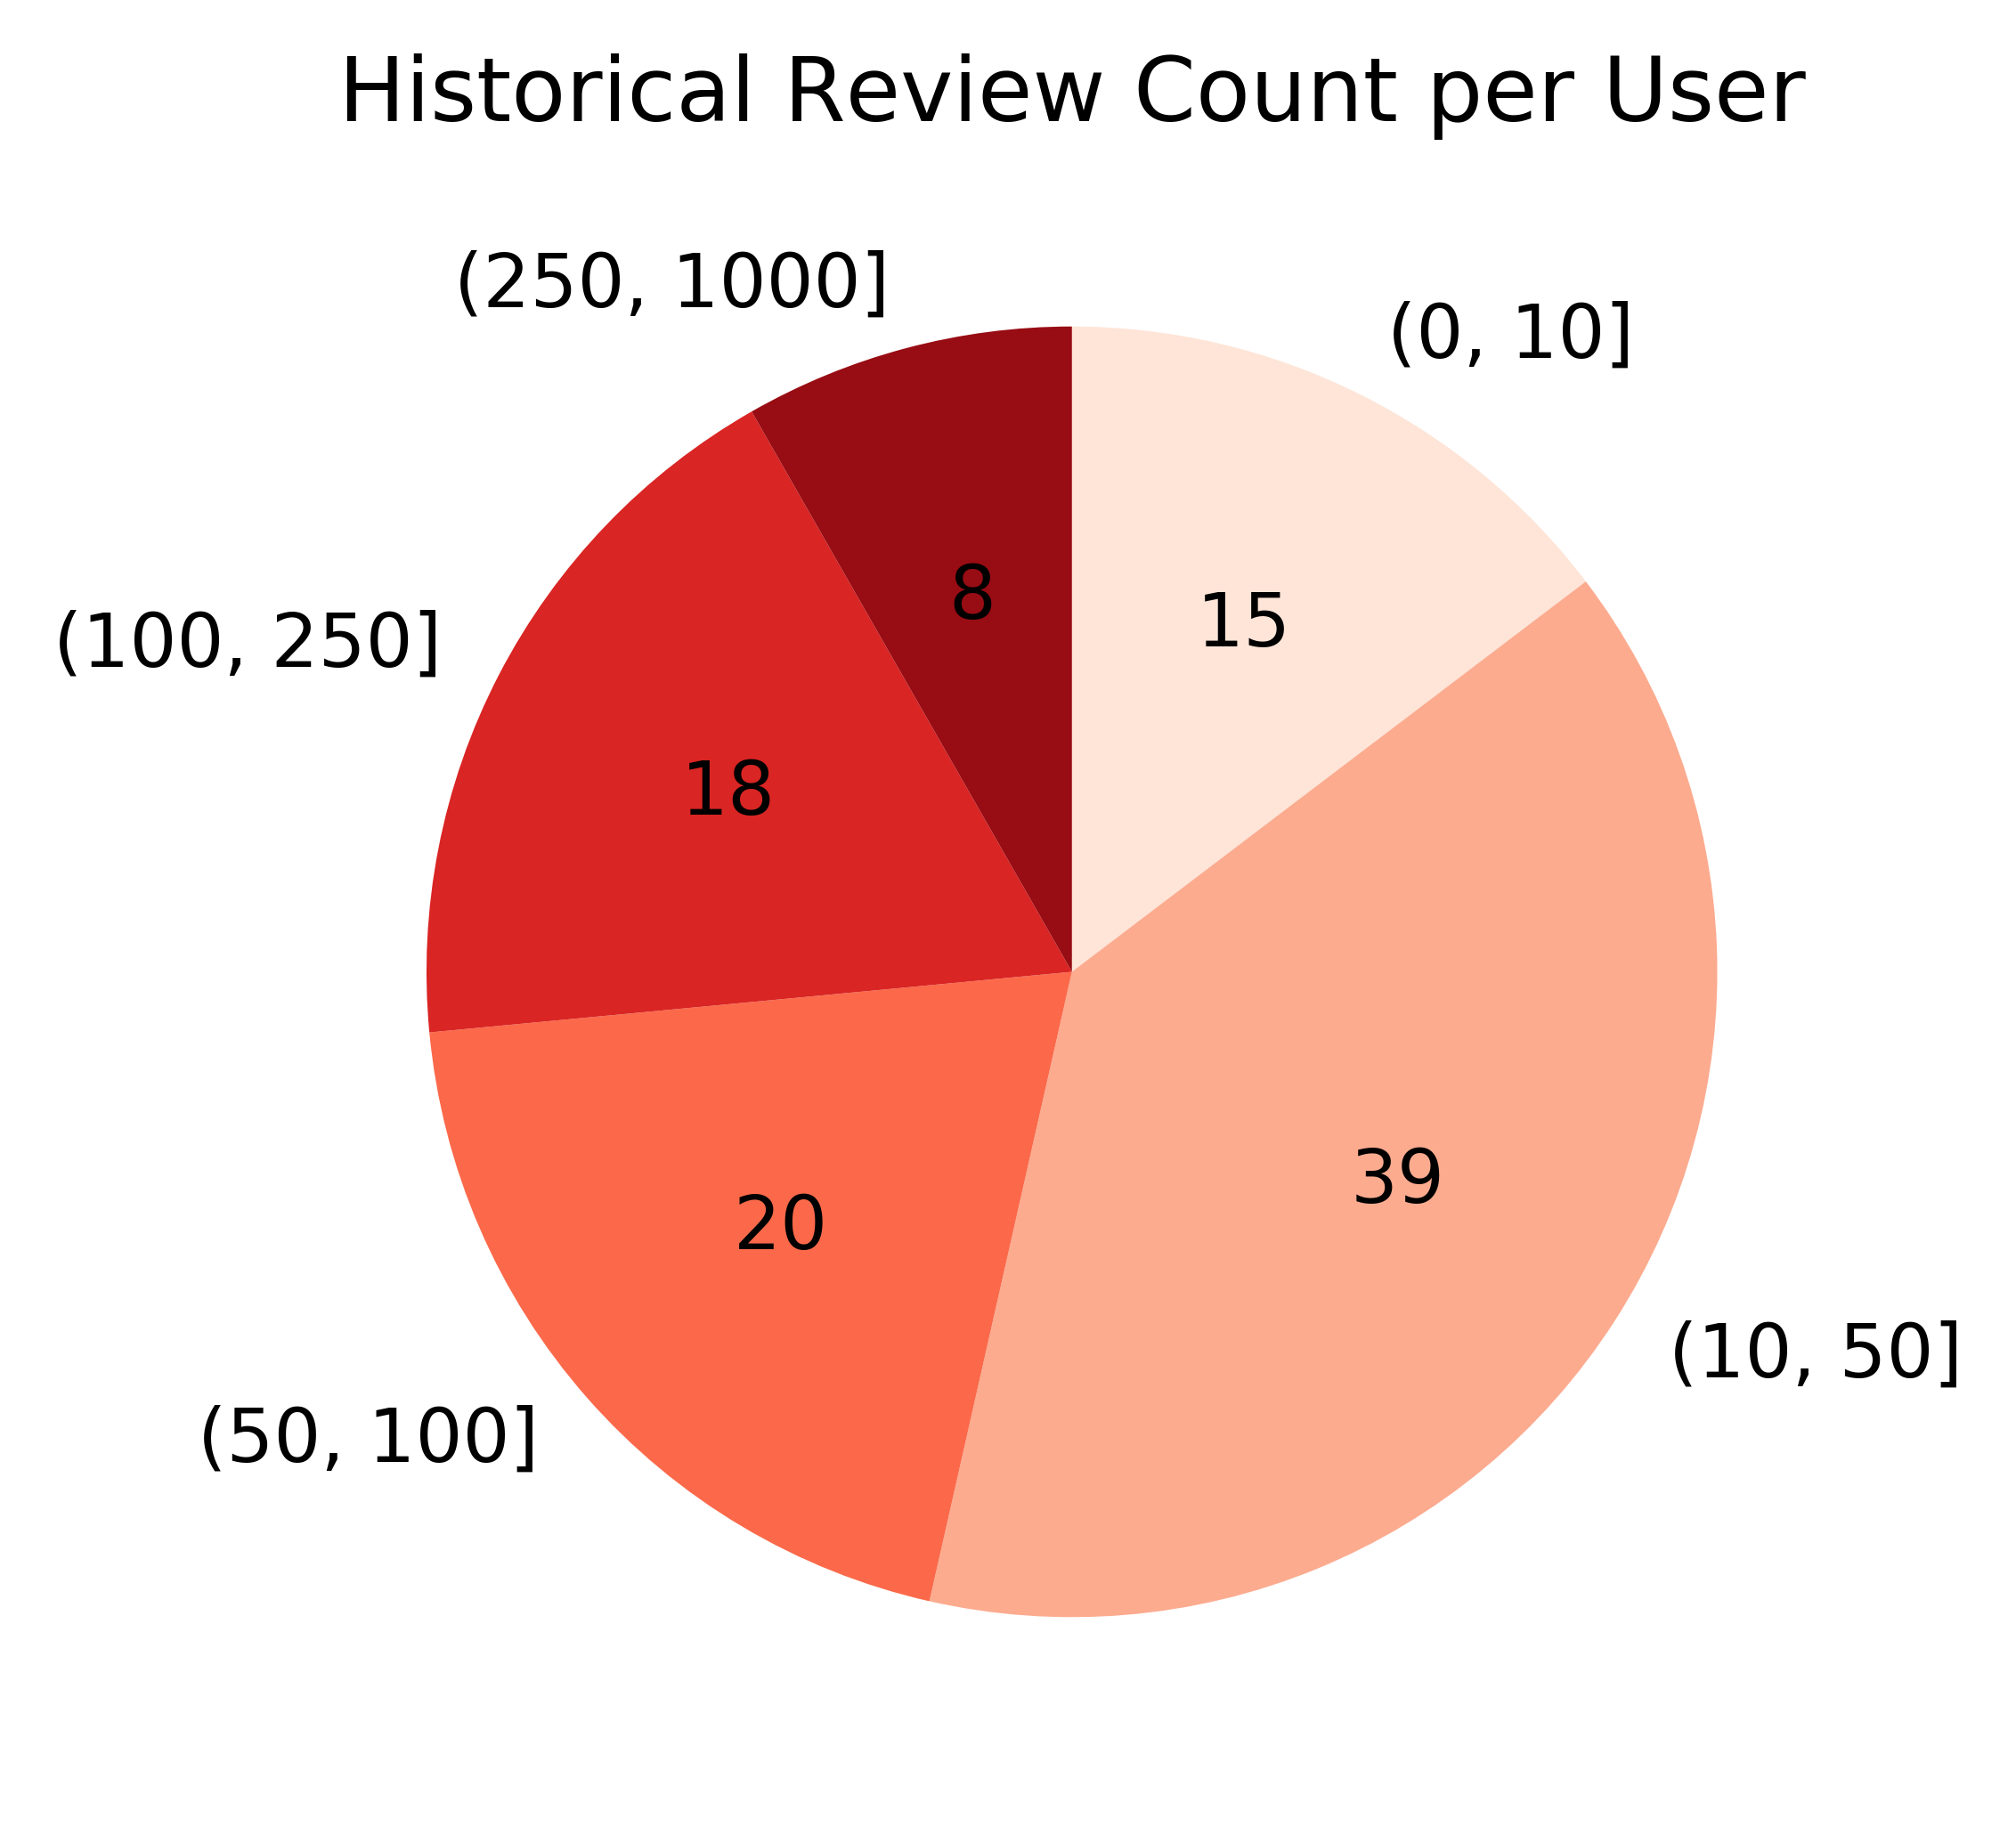

In [1054]:
fig, ax = plt.subplots(dpi=600)
b = users.groupby('n_reviews_bin').reviewer_username.count().rename('count')
_ = ax.set_aspect(1)
_ = plt.pie(a, labels=a.index, counterclock=False, startangle=90, autopct='%.0f',
            colors=cm.Reds([0.1, 0.3, 0.5, 0.7, 0.9]))
_ = plt.title('Historical Review Count per User')
plt.savefig('figures/4_nratings.png')

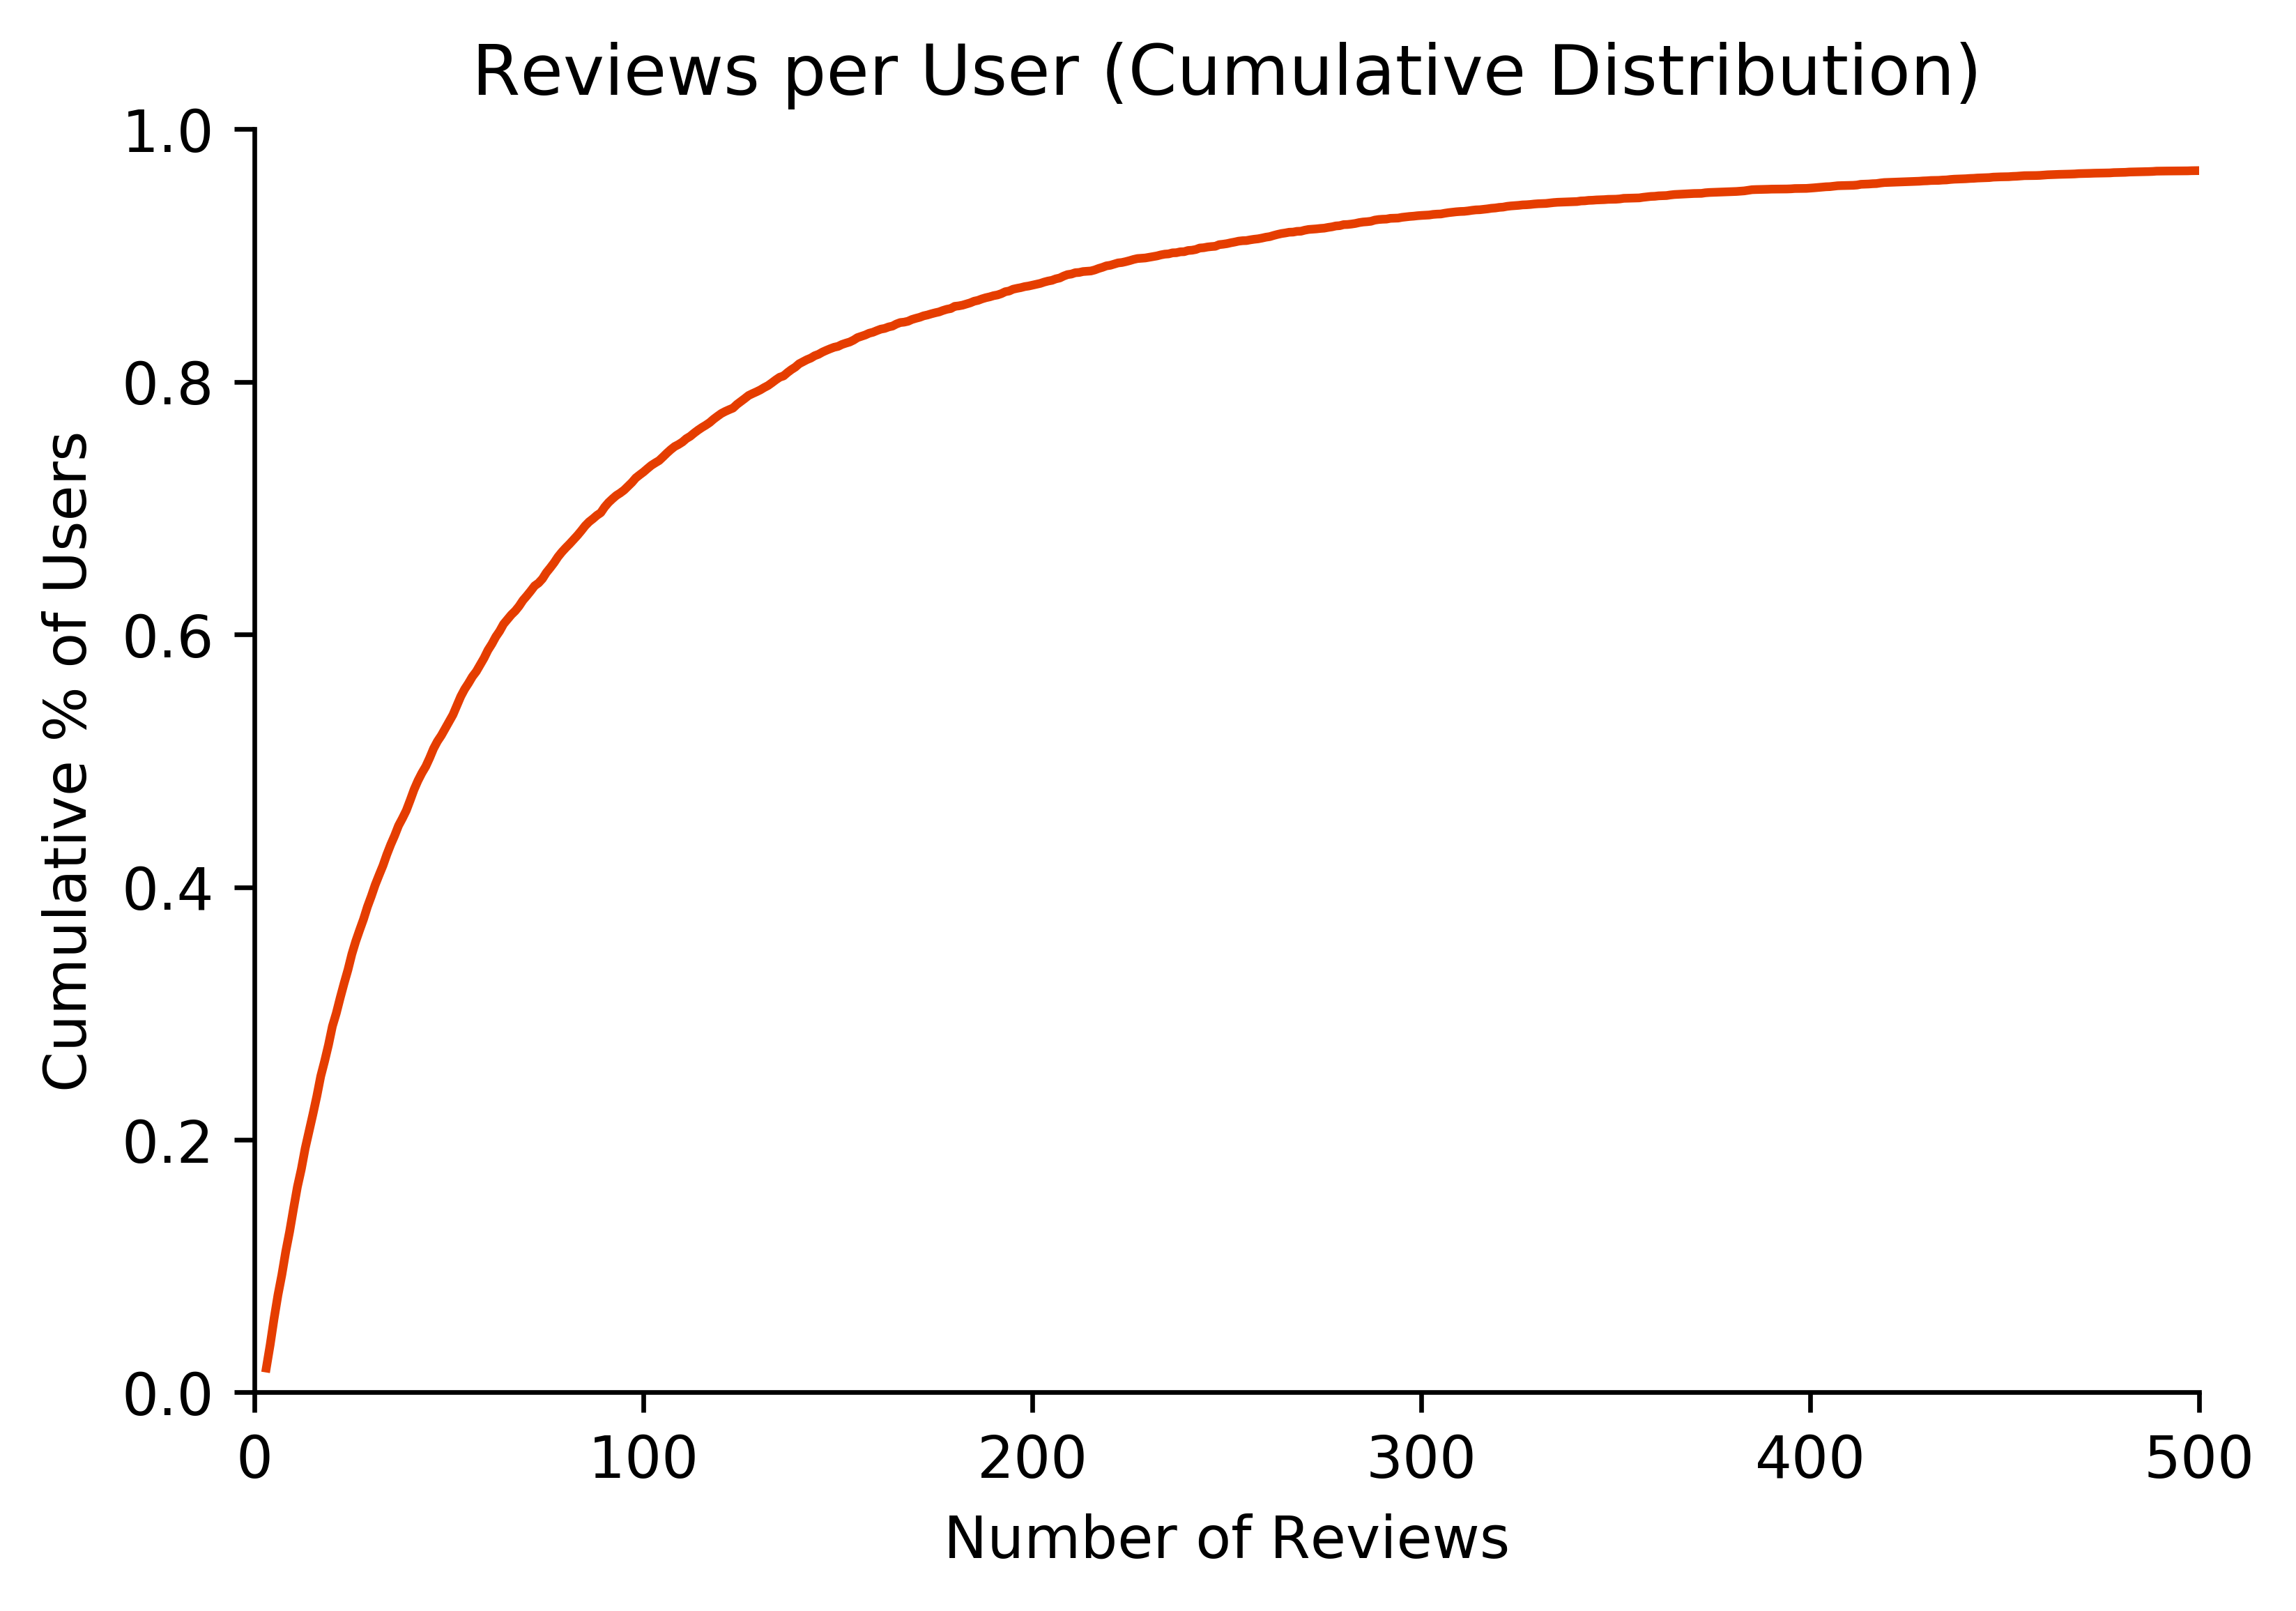

In [1003]:
#distribution of user review count
fig, ax = plt.subplots(dpi=600)

running_total = (users.loc[~pd.isna(users['n_reviews'])].groupby('n_reviews').
                 reviewer_username.count().sort_index().cumsum()) / users.loc[~pd.isna(users['n_reviews']),
                                                                              'reviewer_username'].count()
_ = ax.plot(running_total, color='#E53D00')
_ = ax.set_xlim(0, 500)
_ = ax.set_xlabel('Number of Reviews')
_ = ax.set_ylim(0, 1)
_ = ax.set_ylabel('Cumulative % of Users')
_ = ax.set_title('Reviews per User (Cumulative Distribution)')

_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)

#add a grid line callout for 50%?
plt.savefig('figures/4_nratings_cumulative.png')

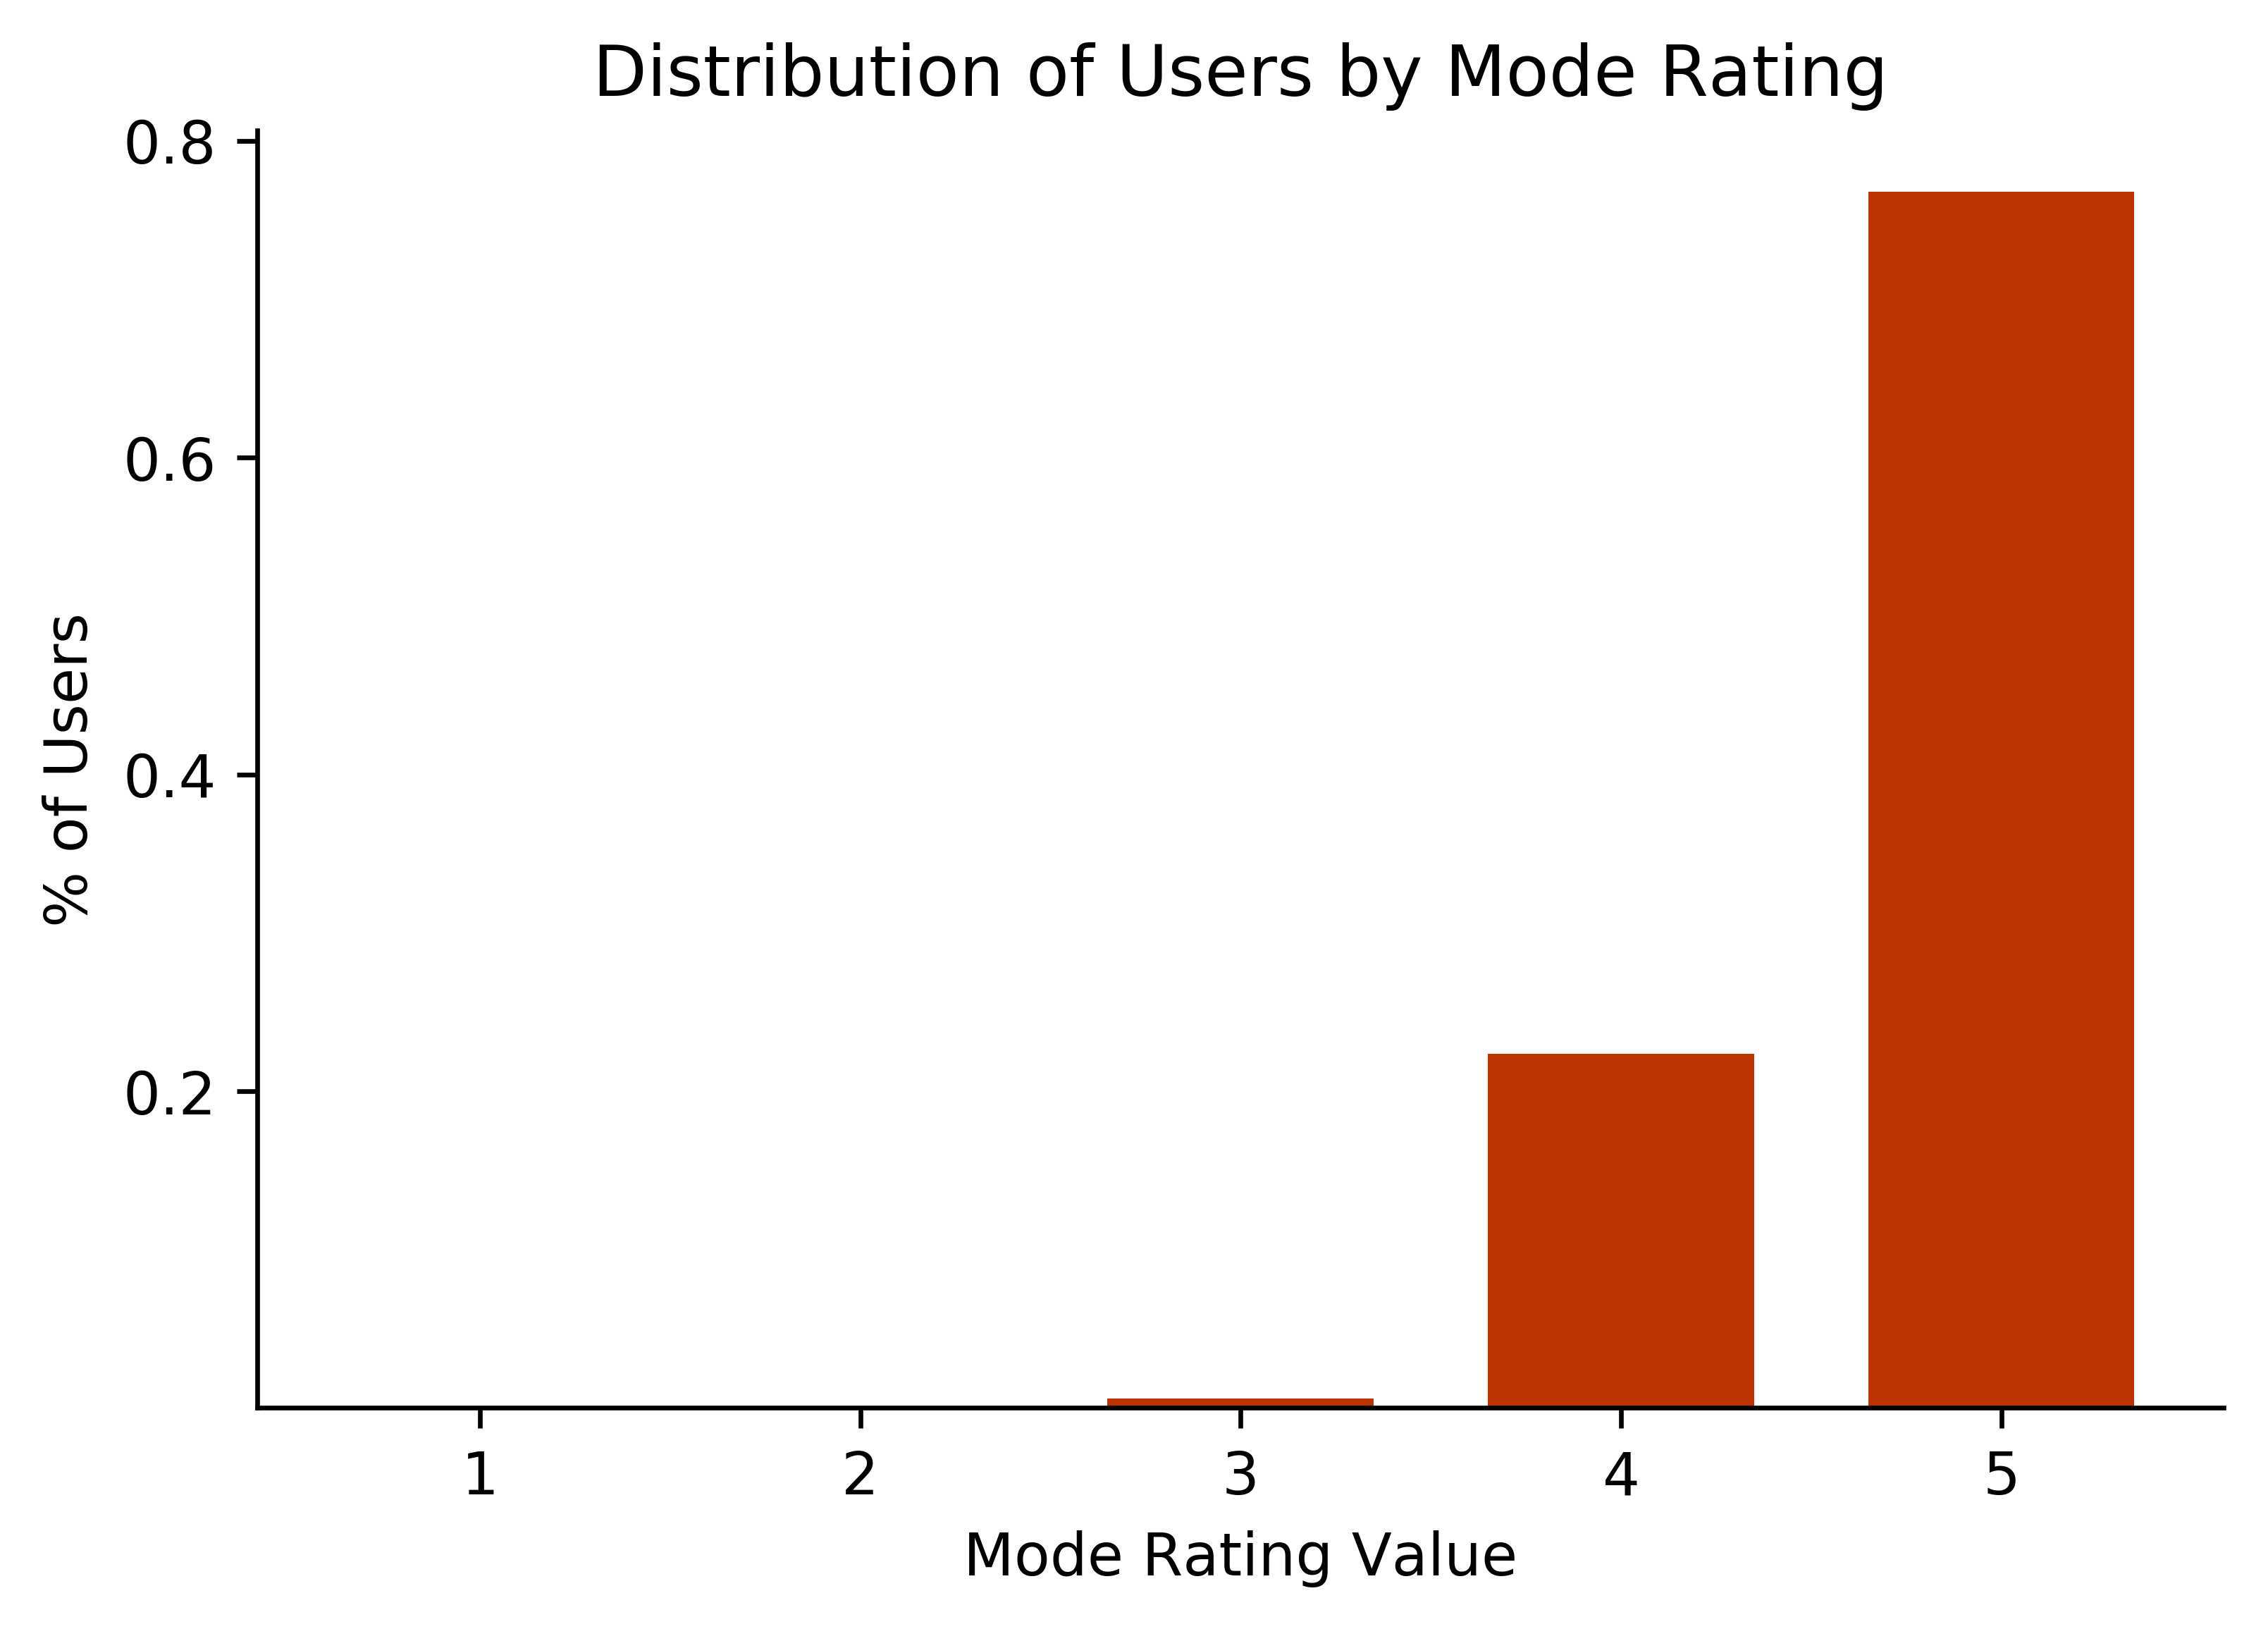

In [1110]:
#user count by mode rating
fig, ax = plt.subplots(dpi=600)

_ = users[users['n_reviews'] >= 5].mode_rating.plot.hist(density=True, bins=range(1,7),
                                                         rwidth=0.7, color='#BC3200', align='left')

_ = plt.xlabel('Mode Rating Value')
_ = plt.ylabel('% of Users')
_ = plt.yticks([0.2, 0.4, 0.6, 0.8])
_ = plt.title('Distribution of Users by Mode Rating')

_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)

plt.savefig('figures/5_moderating.png')

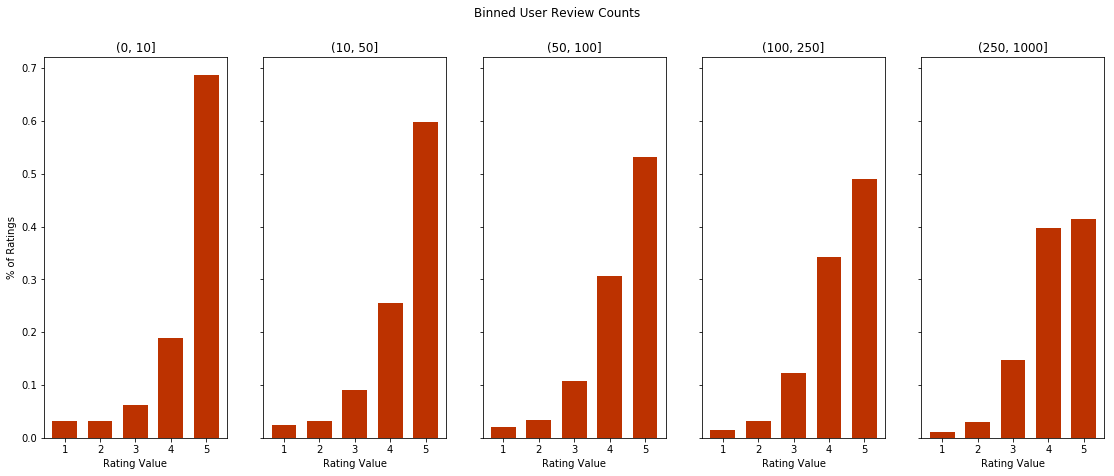

In [1111]:
#distribution by n_reviews bin
f, axarr = plt.subplots(1, 5, sharey=True, figsize=(19, 7))

review_bins = a['n_reviews_bin'].unique()
review_bins = review_bins.sort_values()


for i, b in enumerate(review_bins[0:-1]):
    _ = axarr[i].hist(a.loc[a['n_reviews_bin']==b, 'rating'],
                      density=True, bins=range(1,7), rwidth=0.7, color='#BC3200', align='left')
    _ = axarr[i].set_title(b)
    _ = axarr[i].set_xlabel('Rating Value')

_ = axarr[0].set_ylabel('% of Ratings')
_ = f.suptitle('Binned User Review Counts')

plt.savefig('figures/6_ratings_reviewcount.png', dpi=400, bbox_inches='tight')

In [1122]:
#anova test for n of past reviews
import scipy.stats as stats

l = []
for b in review_bins[0:-1]:
    l += [a.loc[a['n_reviews_bin']==b, 'rating']]

stats.f_oneway(*l)

F_onewayResult(statistic=1188.5582039497585, pvalue=0.0)

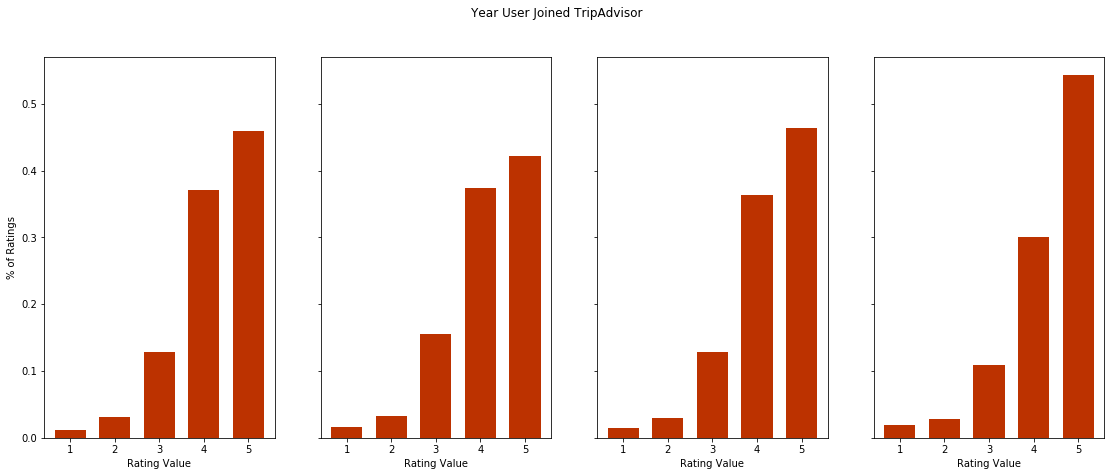

In [1112]:
#distribution by join year
a_g = a.groupby('join_year_bins')

f, axarr = plt.subplots(1, 4, sharey=True, figsize=(19, 7))

for i, a_i in enumerate(a_g):
    _ = axarr[i].hist(a_i[1]['rating'],
                      density=True, bins=range(1,7), rwidth=0.7, color='#BC3200', align='left')
    _ = axarr[i].set_xlabel('Rating Value')

_ = axarr[0].set_ylabel('% of Ratings')
_ = f.suptitle('Year User Joined TripAdvisor')

plt.savefig('figures/7_ratings_joinyear.png', dpi=400, bbox_inches='tight')

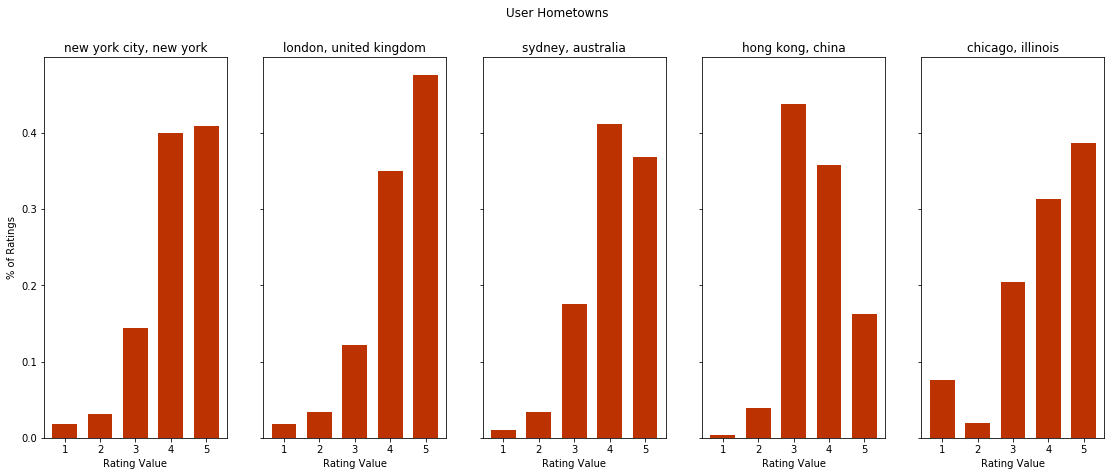

In [1113]:
#distribution by user hometown
top_5_home = a.hometown.value_counts()[0:5].index.tolist()

f, axarr = plt.subplots(1, 5, sharey=True, figsize=(19, 7))

for i, home in enumerate(top_5_home):
    _ = axarr[i].hist(a.loc[a['hometown']==home, 'rating'],
                      density=True, bins=range(1,7), rwidth=0.7, color='#BC3200', align='left')
    _ = axarr[i].set_title(home)
    _ = axarr[i].set_xlabel('Rating Value')

_ = axarr[0].set_ylabel('% of Ratings')
_ = f.suptitle('User Hometowns')

plt.savefig('figures/8_ratings_hometown.png', dpi=400, bbox_inches='tight')

In [1120]:
#anova test for hometown
import scipy.stats as stats

l = []
for home in top_5_home:
    l += [a.loc[a['hometown']==home, 'rating'].values]

stats.f_oneway(*l)

F_onewayResult(statistic=701.8724475890426, pvalue=0.0)

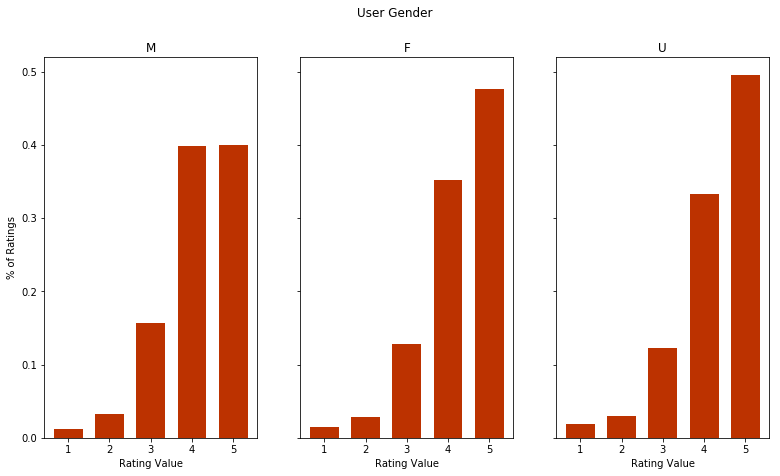

In [1114]:
#distribution by gender
a['gender'] = a.gender.fillna('U')

f, axarr = plt.subplots(1, 3, sharey=True, figsize=(13, 7))

for i, gender in enumerate(['M', 'F', 'U']):
    _ = axarr[i].hist(a.loc[a['gender']==gender, 'rating'],
                      density=True, bins=range(1,7), rwidth=0.7, color='#BC3200', align='left')
    _ = axarr[i].set_title(gender)
    _ = axarr[i].set_xlabel('Rating Value')

_ = axarr[0].set_ylabel('% of Ratings')
_ = f.suptitle('User Gender')

plt.savefig('figures/9_ratings_gender.png', dpi=400, bbox_inches='tight')

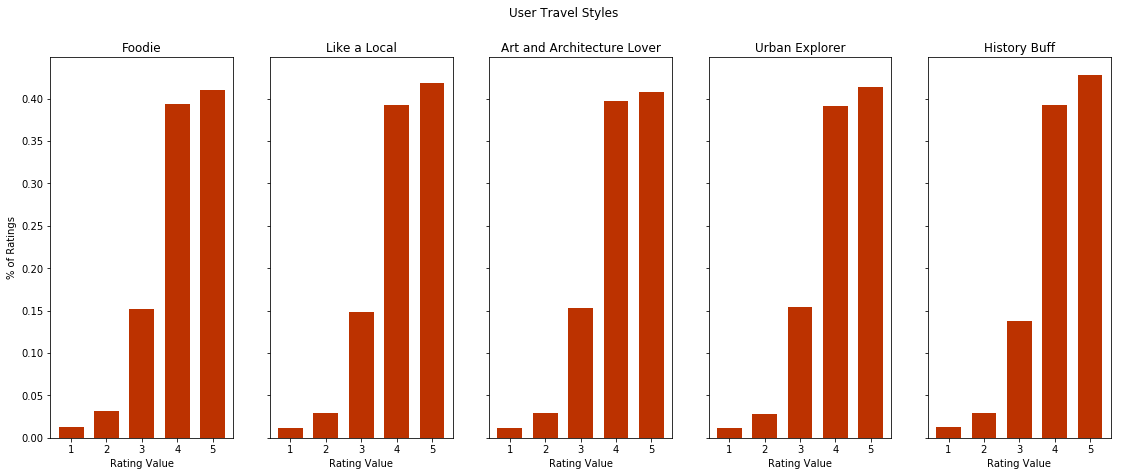

In [1115]:
#distribution by user tags
a_tags = a.merge(user_tag, on='reviewer_username')
top_5_tags = a_tags.tags_y.value_counts()[0:5].index.tolist()

f, axarr = plt.subplots(1, 5, sharey=True, figsize=(19, 7))

for i, tag in enumerate(top_5_tags):
    _ = axarr[i].hist(a_tags.loc[a_tags['tags_y']==tag, 'rating'],
                      density=True, bins=range(1,7), rwidth=0.7, color='#BC3200', align='left')
    _ = axarr[i].set_title(tag)
    _ = axarr[i].set_xlabel('Rating Value')

_ = axarr[0].set_ylabel('% of Ratings')
_ = f.suptitle('User Travel Styles')

plt.savefig('figures/10_ratings_tags.png', dpi=400, bbox_inches='tight')

In [1123]:
#anova test for travel style
import scipy.stats as stats

l = []
for tag in top_5_tags:
    l += [a_tags.loc[a_tags['tags_y']==tag, 'rating'].values]

stats.f_oneway(*l)

F_onewayResult(statistic=55.644822642333345, pvalue=5.276090454051911e-47)